In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn theme
sns.set(style="whitegrid")


# Task 1

In [2]:
df = pd.read_csv("C:/Users/GLOBAL/Documents/Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape               # Rows and columns
df.info()              # Data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()          # Summary statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Task 2

Clean a Dataset with Missing and Categorical Data

Take a dataset (e.g., Titanic) and handle missing
values by filling or dropping them. Convert categorical
columns (e.g.,

"Sex"
,
"Embarked") into numeric
values using label encoding or one-hot encoding.
️ Tools: Pandas, NumPy
🎯 Goal: Learn how to prepare real-world data for
analysis or modeling.

In [5]:
df.isnull().sum()      # Count of missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if it exists
df = df.drop(columns=['Cabin'], errors='ignore')

# Convert 'Sex' and 'Embarked' to category type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Verify changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.8+ KB


In [14]:
# Survival rate by Gender
print("Survival Rate by Gender:")
print(df.groupby('Sex', observed=True)['Survived'].mean())
print()

# Survival rate by Passenger Class
print("Survival Rate by Passenger Class:")
print(df.groupby('Pclass', observed=True)['Survived'].mean())
print()

# Survival rate by Embarked Location
print("Survival Rate by Embarked Port:")
print(df.groupby('Embarked', observed=True)['Survived'].mean())

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


# task 3

Visualize Key Insights from Data

Use a dataset of your choice to generate different
visualizations such as bar plots, histograms, pie
charts, and boxplots. Highlight trends and
comparisons in the data.
️ Tools: Matplotlib, Seaborn
🎯 Goal: Communicate data-driven insights through
charts and plots.

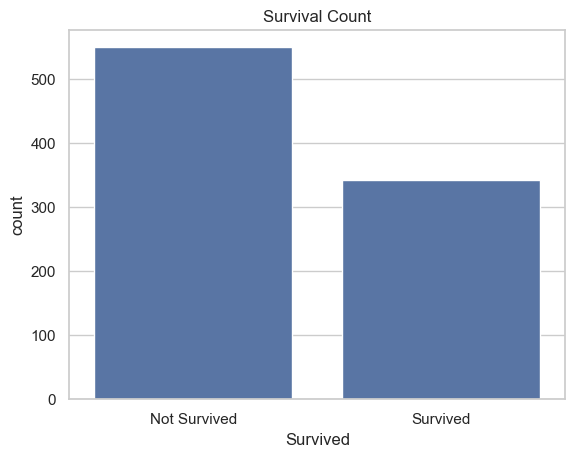

In [ ]:
# Step 1: Visualizations

# 1. Countplot: Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

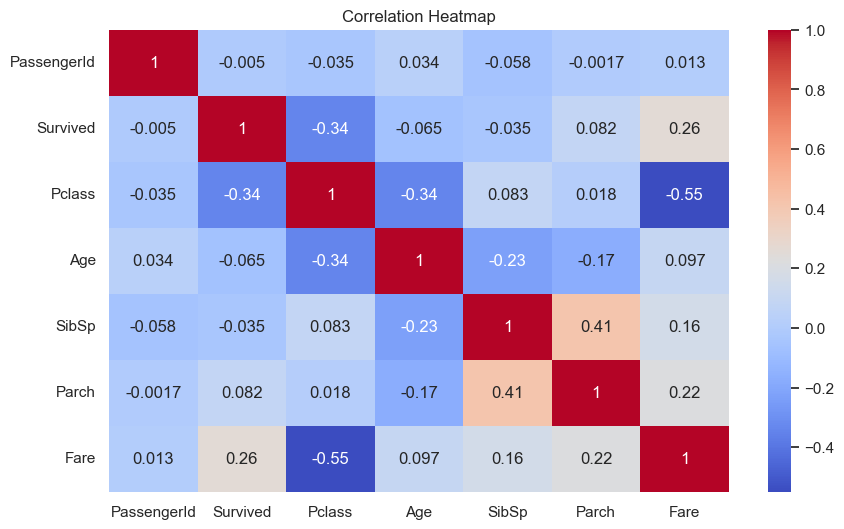

In [16]:
# 2. Heatmap: Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

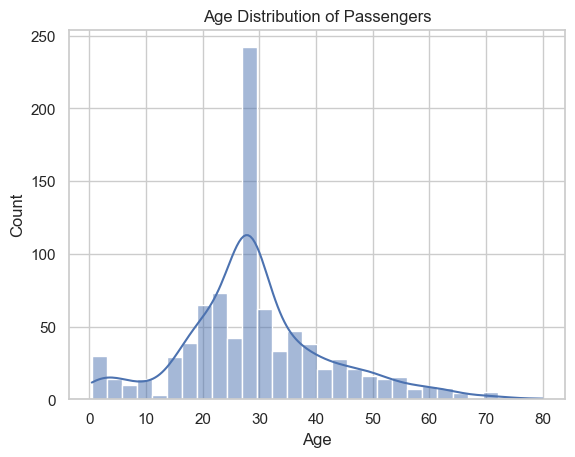

In [17]:
# 3. Histogram: Age Distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

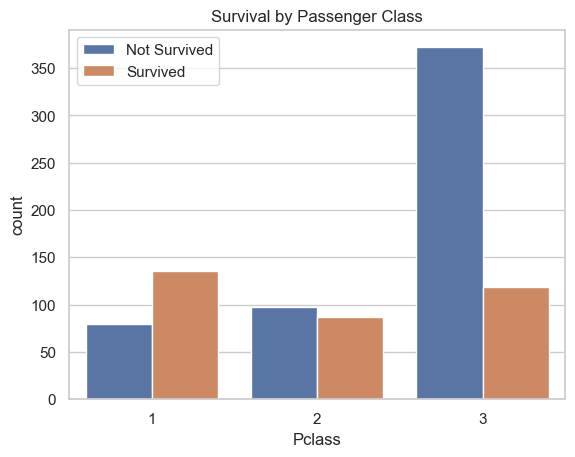

In [18]:
# 4. Countplot: Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

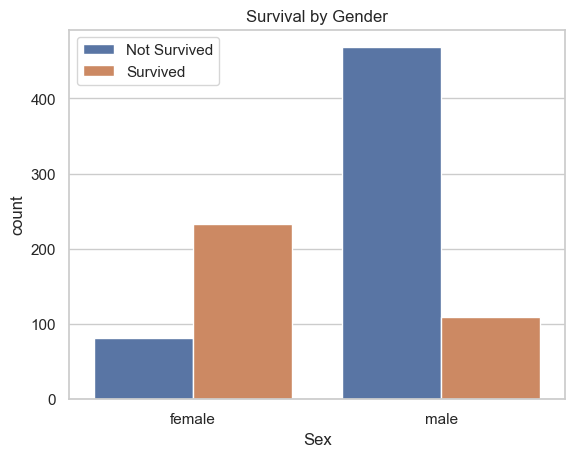

In [19]:
# 5 Countplot: Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

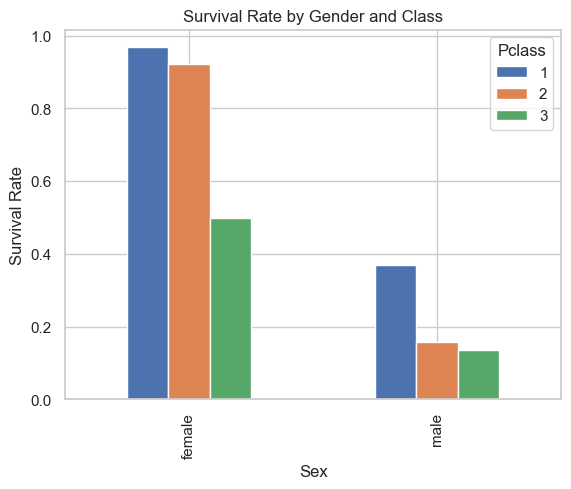

In [21]:
# 6. Bonus: Bar Plot - Survival Rate by Gender and Class (Fixed)
survival_rate = df.groupby(['Sex', 'Pclass'], observed=True)['Survived'].mean().unstack()
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.show()


# Interpretation 

.head() shows the first 5 rows – helps to see what the data looks like.

.info() shows column types and missing values – e.g., "Age" and "Cabin" have missing values.

.describe() gives summary stats – for example, the average age is ~29.

isnull().sum() tells how many values are missing – important for data cleaning.

Why it matters:
This helps us understand the structure of the dataset, what cleaning is needed, and what type of values we’re working with (e.g., numbers or categories).
Most passengers are between 20 to 40 years old.

There's a peak near 28–30, which is close to the average age.

Some people are very young (babies) or old (70+), but fewer in number.
Most people paid low fares (under 50), but some paid very high (over 500).

The distribution is skewed to the right – a few passengers paid a lot (maybe first class).

Why it matters:
Knowing the spread of age and fare helps us understand the passengers’ profile and if these affect survival.
Survived vs Fare: Moderate positive correlation → people who paid more had better survival.

Survived vs Pclass: Negative correlation → higher class (1st) = better survival.

Other features like SibSp and Parch have weak correlations.

Why it matters:
This helps us choose important features for modeling. Features with strong correlation are likely useful for prediction.
Passengers who boarded from Cherbourg (C) had the highest survival rate.

Could be related to their class or location on the ship.

Why it matters:
Grouped analysis tells us how combinations of factors (like gender & class) affect survival.
This means survival depends on gender.

We reject the null hypothesis (that gender and survival are unrelated).

So, gender had a statistically significant impact on survival chances.

Why it matters:
Hypothesis testing confirms that patterns we see (like women surviving more) are not just by chance.
